In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from os import path as op
import nibabel as nb
import numpy as np
from scipy.stats import zscore
from mriqc.interfaces.functional import auto_mask, find_spikes
from mriqc.interfaces.functional import Spikes
import matplotlib.pyplot as plt
from mriqc.interfaces.viz_utils import plot_mosaic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
sub_id = '51205'
func_name = op.abspath('./example_artifacts_dataset/sub-ben01/func/sub-ben01_task-unknown_bold.nii.gz')
#func_name = op.abspath('./example_artifacts_dataset/sub-arielle01/func/sub-arielle01_task-unknown_bold.nii.gz')
#func_name = op.abspath('./example_artifacts_dataset/sub-ds001s07/func/sub-ds001s07_task-balloonanalogrisktask_run-03_bold.nii.gz')
#func_name = op.abspath('./example_artifacts_dataset/sub-steph02/func/sub-steph02_task-unknown_bold.nii.gz')

mask_name = op.abspath('./data/sub-ben01_task-unknown_bold_mask.nii.gz')
#func_name = './example_artifacts_dataset/sub-{0}/func/sub-{0}_task-rest_bold.nii.gz'.format(sub_id)
#mask_name = op.abspath('./data/sub-{}_task-rest_bold_mcf_mask.nii.gz'.format(sub_id))
ntsteps = nb.load(func_name).get_data().shape[-1]

/home/oesteban/workspace/mriqc/mriqc/workflows/utils.py:145: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ftmask[size[0]/2, size[1]/2] = 0


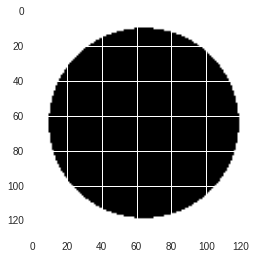

In [34]:
from mriqc.workflows.utils import spectrum_mask
dshape = nb.load(func_name).get_data().shape
ftmask = spectrum_mask((dshape[0], dshape[1]))
plt.imshow(ftmask)

In [37]:
from mriqc.workflows.utils import slice_wise_fft

fft_nii, energy_file, spikes_file = slice_wise_fft(func_name, ftmask, spike_thres=4)

In [40]:
from mriqc.viz.fmriplots import fMRIPlot
myplot = fMRIPlot(func_name)
myplot.add_spikes(np.loadtxt(spikes_file), 'Spikes (brainmask)')
#myplot.add_spikes(res2.outputs.out_tsz, 'Spikes (chrismask)')
myplot.add_confounds(np.random.normal(size=(ntsteps,)), 'FD')
myplot.plot()

TypeError: __init__() takes at least 3 arguments (2 given)

In [36]:
sp_if = Spikes(in_file=func_name, in_mask=mask_name, out_tsz='brain.txt')
res = sp_if.run()

sp_if2 = Spikes(in_file=func_name, automask='chris', out_tsz='chris.txt', no_zscore=False)
res2 = sp_if2.run()

NameError: name 'mask_name' is not defined